In [1]:
import sys
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import activations
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from generation_model import create_model

In [2]:
labels = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "K", "L", "M", "N", "O", "P", "Q",
          "R", "S", "T", "U", "V", "W", "X", "Y"]

In [8]:
X = (np.load('./dataset/data.npy', allow_pickle=True))
X_shape = X.shape
X = X.reshape(X_shape[0], X_shape[1]*X_shape[2])
X = X[:,:, np.newaxis]

y = []
for i in range(24):
  y = y + [i]*804
y = np.array(y)
y = to_categorical(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3333)
X_train, X_val, y_train, y_val =  train_test_split(X_train, y_train, test_size=0.1429)

In [9]:
model = create_model()

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              646144    
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 24)                6

In [11]:
epoch = 15
batch_size = 64
model.fit(x = X_train, y = y_train, batch_size = batch_size, epochs = epoch, validation_data = (X_val, y_val))

Epoch 1/15
173/173 [==============================] - 2s 11ms/step - loss: 1.1292 - accuracy: 0.7110 - val_loss: 0.2548 - val_accuracy: 0.9734
Epoch 2/15
173/173 [==============================] - 2s 10ms/step - loss: 0.2530 - accuracy: 0.9376 - val_loss: 0.1797 - val_accuracy: 0.9402
Epoch 3/15
173/173 [==============================] - 2s 10ms/step - loss: 0.2103 - accuracy: 0.9362 - val_loss: 0.1129 - val_accuracy: 0.9695
Epoch 4/15
173/173 [==============================] - 2s 10ms/step - loss: 0.1786 - accuracy: 0.9427 - val_loss: 0.1080 - val_accuracy: 0.9603
Epoch 5/15
173/173 [==============================] - 2s 10ms/step - loss: 0.1774 - accuracy: 0.9353 - val_loss: 0.0913 - val_accuracy: 0.9766
Epoch 6/15
173/173 [==============================] - 2s 10ms/step - loss: 0.1909 - accuracy: 0.9288 - val_loss: 0.1046 - val_accuracy: 0.9521
Epoch 7/15
173/173 [==============================] - 2s 10ms/step - loss: 0.1601 - accuracy: 0.9401 - val_loss: 0.0726 - val_accuracy: 0.9821

In [12]:
y_pre = model.predict(X_test)

_y_pre = np.argmax(y_pre, axis = 1)
_y_test = np.argmax(y_test, axis = 1)

201/201 [==============================] - 1s 3ms/step


In [13]:
print("acc:", accuracy_score(_y_pre, _y_test))
print("f1:", f1_score(_y_pre, _y_test, average='macro'))

acc: 0.9869402985074627
f1: 0.9869363676158295


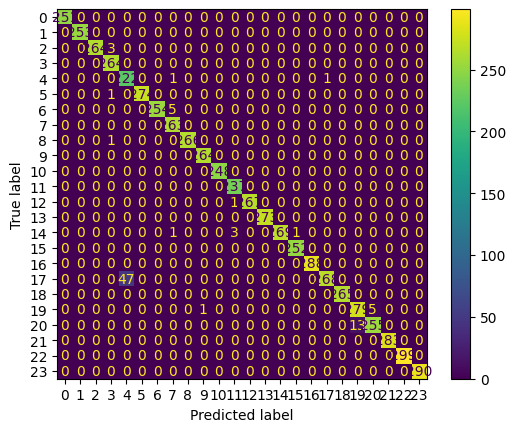

In [14]:
cm = confusion_matrix(_y_pre, _y_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [15]:
print(labels[17])
print(labels[4])

S
E


In [16]:
model.save_weights(".\weights\weights_ANN.h5")